In [7]:
import matplotlib.pyplot as plt
from expdespy.datasets.dic_milho import load_dic_milho
from expdespy.datasets.dbc_caprinos import load_dbc_caprinos
from expdespy.models import DIC, DBC
from expdespy.utils import get_summary


# DIC (Delineamento Interamente ao Acaso)

## Load the data

In [2]:
print("### Exemplo DIC - Milho ###")

df_dic, desc_dic = load_dic_milho()
print("Descrição do dataset DIC:")
print(desc_dic)

### Exemplo DIC - Milho ###
Descrição do dataset DIC:
Experimento com 4 variedades de milho (A, B, C, D) distribuídas aleatoriamente em 20 parcelas (5 por variedade). A variável resposta é a produtividade em sacas por hectare. Usado para análise com DIC e testes de comparação múltipla.


In [9]:
df_dic

,variedade,produtividade
0,A,25
1,A,26
2,A,20
3,A,23
4,A,21
5,B,31
6,B,25
7,B,28
8,B,27
9,B,24


In [8]:
get_summary(df_dic)

,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
variedade,object,0,0.0,A,25.0,4,"[A, B, C, D]"
produtividade,int64,0,0.0,25,15.0,13,...


In [10]:
# Instanciar modelo
dic_model = DIC(data=df_dic, response="produtividade", treatment="variedade")

# ANOVA
anova_result = dic_model.anova()
print("\nTabela ANOVA DIC:")
print(anova_result)


Tabela ANOVA DIC:
              sum_sq    df         F    PR(>F)
C(variedade)  163.75   3.0  7.797619  0.001976
Residual      112.00  16.0       NaN       NaN


### Exemplo DIC - Milho ###
Descrição do dataset DIC:
Experimento com 4 variedades de milho (A, B, C, D) distribuídas aleatoriamente em 20 parcelas (5 por variedade). A variável resposta é a produtividade em sacas por hectare. Usado para análise com DIC e testes de comparação múltipla.

Tabela ANOVA DIC:
              sum_sq    df         F    PR(>F)
C(variedade)  163.75   3.0  7.797619  0.001976
Residual      112.00  16.0       NaN       NaN

Pressupostos ANOVA:
normality (Shapiro-Wilk): Aceito
homoscedasticity (Levene): Aceito

Teste post hoc (Tukey):
  group1 group2  meandiff   p-adj   lower    upper  reject
0      A      B       4.0  0.1192 -0.7874   8.7874   False
1      A      C       3.0  0.3123 -1.7874   7.7874   False
2      A      D       8.0  0.0011  3.2126  12.7874    True
3      B      C      -1.0  0.9313 -5.7874   3.7874   False
4      B      D       4.0  0.1192 -0.7874   8.7874   False
5      C      D       5.0  0.0391  0.2126   9.7874    True


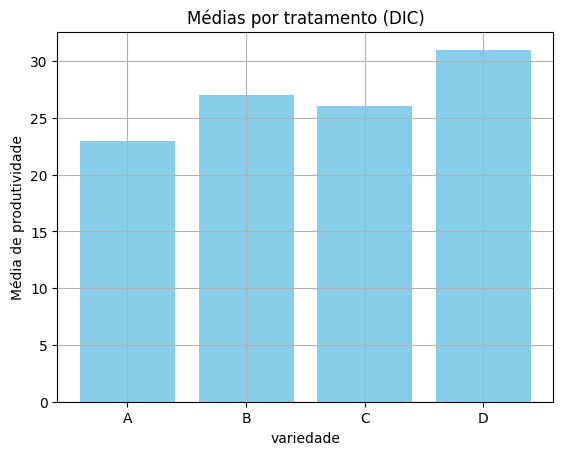


### Exemplo DBC - Caprinos ###
Descrição do dataset DBC:
Experimento com 5 produtos comerciais fornecidos a caprinos organizados em 3 blocos de acordo com a idade. A variável resposta é a concentração de micronutrientes no sangue (ppm). Usado para análise com DBC.

Tabela ANOVA DBC:
            sum_sq   df          F    PR(>F)
C(produto)  3090.0  4.0  33.586957  0.000048
C(bloco)    2770.0  2.0  60.217391  0.000015
Residual     184.0  8.0        NaN       NaN

Pressupostos ANOVA:
normality (Shapiro-Wilk): Aceito
homoscedasticity (Levene): Aceito

Teste post hoc (Tukey):
   group1  group2  meandiff   p-adj    lower    upper  reject
0       1       2       5.0  0.9960 -41.1847  51.1847   False
1       1       3      20.0  0.6269 -26.1847  66.1847   False
2       1       4      25.0  0.4331 -21.1847  71.1847   False
3       1       5      40.0  0.0986  -6.1847  86.1847   False
4       2       3      15.0  0.8180 -31.1847  61.1847   False
5       2       4      20.0  0.6269 -26.1847  66.1

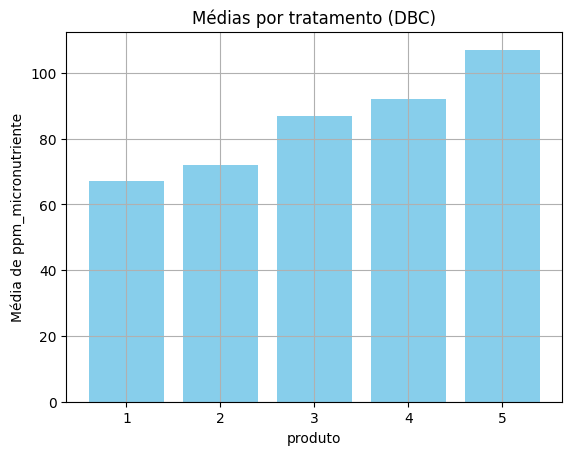

In [ ]:


# Instanciar modelo
dic_model = DIC(data=df_dic, response="produtividade", treatment="variedade")

# ANOVA
anova_result = dic_model.anova()
print("\nTabela ANOVA DIC:")
print(anova_result)

# Verificar pressupostos
assumptions = dic_model.check_assumptions()
print("\nPressupostos ANOVA:")
for k, v in assumptions.items():
    print(f"{k}: {'Aceito' if v else 'Rejeitado'}")

# Teste post hoc
posthoc_res = dic_model.posthoc()
print("\nTeste post hoc (Tukey):")
print(posthoc_res)

# Plot médias
fig, ax = plt.subplots()
dic_model.plot_means(ax=ax)
ax.set_title("Médias por tratamento (DIC)")
plt.show()

# 3. Exemplo DBC (Delineamento em Blocos Casualizados)

print("\n### Exemplo DBC - Caprinos ###")

# Carregar dados
df_dbc, desc_dbc = load_dbc_caprinos()
print("Descrição do dataset DBC:")
print(desc_dbc)

# Instanciar modelo
dbc_model = DBC(data=df_dbc, response="ppm_micronutriente", treatment="produto", block="bloco")

# ANOVA
anova_result_dbc = dbc_model.anova()
print("\nTabela ANOVA DBC:")
print(anova_result_dbc)

# Verificar pressupostos
assumptions_dbc = dbc_model.check_assumptions()
print("\nPressupostos ANOVA:")
for k, v in assumptions_dbc.items():
    print(f"{k}: {'Aceito' if v else 'Rejeitado'}")

# Teste post hoc
posthoc_res_dbc = dbc_model.posthoc()
print("\nTeste post hoc (Tukey):")
print(posthoc_res_dbc)

# Plot médias
fig, ax = plt.subplots()
dbc_model.plot_means(ax=ax)
ax.set_title("Médias por tratamento (DBC)")
plt.show()